In [260]:
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import sklearn

## 1. Análise Exploratória dos Dados

In [262]:
df_data = pd.read_csv("SaoPauloProperties.csv")

In [263]:
df_data.head()

Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  Furnished  \
0    930    220    47      2        2       1        1         0          0   
1   1000    148    45      2        2       1        1         0          0   
2   1000    100    48      2        2       1        1         0          0   
3   1000    200    48      2        2       1        1         0          0   
4   1300    410    55      2        2       1        1         1          0   

   Swimming Pool  New               District Negotiation Type Property Type  \
0              0    0  Artur Alvim/São Paulo             rent     apartment   
1              0    0  Artur Alvim/São Paulo             rent     apartment   
2              0    0  Artur Alvim/São Paulo             rent     apartment   
3              0    0  Artur Alvim/São Paulo             rent     apartment   
4              0    0  Artur Alvim/São Paulo             rent     apartment   

    Latitude  Longitude  
0 -23.543138 -46.479486  
1 -23.550239 -46.480718  
2 -23.542818 -46.485665  
3 -23.547171 -46.483014  
4 -23.525025 -46.482436

In [264]:
df_rent = df_data[df_data['Negotiation Type'] == "rent"]

### Visualização Geográfica

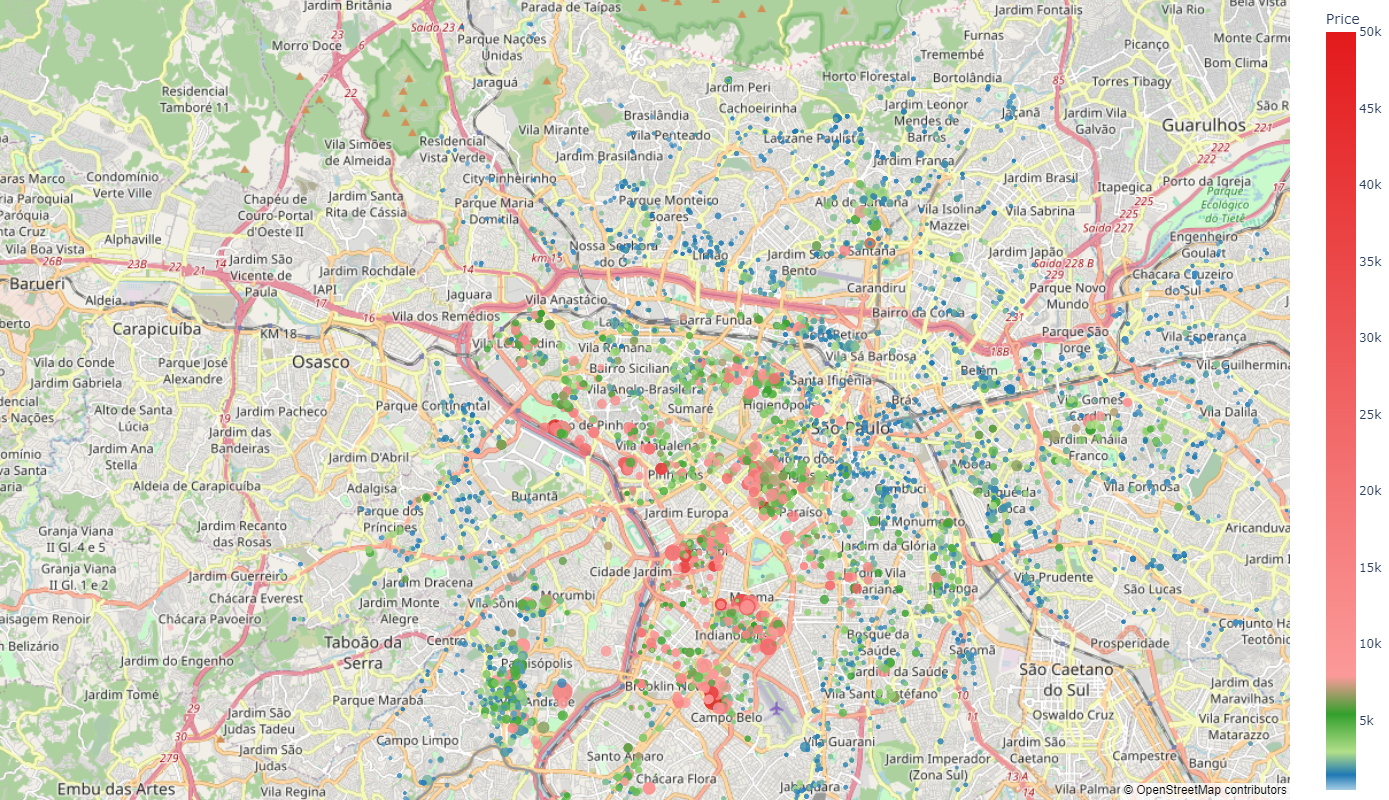

In [266]:

fig = px.scatter_mapbox(df_rent, lat='Latitude', lon='Longitude', color='Price', size='Size',
                        color_continuous_scale=[ # Definindo Escala de cores 
                            [0, 'rgb(166,206,227, 0.5)'],
                            [0.02, 'rgb(31,120,180,0.5)'],
                            [0.05, 'rgb(178,223,138,0.5)'],
                            [0.10, 'rgb(51,160,44,0.5)'],
                            [0.15, 'rgb(251,154,153,0.5)'],
                            [1, 'rgb(227,26,28,0.5)']
                        ],
                        size_max=15, zoom=11.2, opacity=0.8)

# Removendo as bordas brancas ao redor do mapa e definindo estilo e posicao
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(height=800, mapbox=dict(center=go.layout.mapbox.Center(lat=-23.543138, lon=-46.69486)))
fig.show()

### Visualização Estatística

In [268]:
#Observando tipos de dados
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7228 entries, 0 to 11209
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             7228 non-null   int64  
 1   Condo             7228 non-null   int64  
 2   Size              7228 non-null   int64  
 3   Rooms             7228 non-null   int64  
 4   Toilets           7228 non-null   int64  
 5   Suites            7228 non-null   int64  
 6   Parking           7228 non-null   int64  
 7   Elevator          7228 non-null   int64  
 8   Furnished         7228 non-null   int64  
 9   Swimming Pool     7228 non-null   int64  
 10  New               7228 non-null   int64  
 11  District          7228 non-null   object 
 12  Negotiation Type  7228 non-null   object 
 13  Property Type     7228 non-null   object 
 14  Latitude          7228 non-null   float64
 15  Longitude         7228 non-null   float64
dtypes: float64(2), int64(11), object(3)
memory usa

In [269]:
#Observação estatística
df_rent.describe()

Price        Condo         Size        Rooms      Toilets  \
count   7228.000000  7228.000000  7228.000000  7228.000000  7228.000000   
mean    3077.669065   825.194798    89.486165     2.304234     2.105562   
std     3522.830284   835.621937    63.976416     0.829108     0.998162   
min      480.000000     0.000000    30.000000     1.000000     1.000000   
25%     1350.000000   395.750000    52.000000     2.000000     2.000000   
50%     2000.000000   595.000000    67.000000     2.000000     2.000000   
75%     3300.000000   990.000000   100.000000     3.000000     2.000000   
max    50000.000000  9500.000000   880.000000    10.000000     8.000000   

            Suites      Parking     Elevator    Furnished  Swimming Pool  \
count  7228.000000  7228.000000  7228.000000  7228.000000    7228.000000   
mean      1.024488     1.452269     0.299806     0.172939       0.487963   
std       0.884241     0.889535     0.458205     0.378220       0.499890   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000     1.000000     0.000000     0.000000       0.000000   
50%       1.000000     1.000000     0.000000     0.000000       0.000000   
75%       1.000000     2.000000     1.000000     0.000000       1.000000   
max       5.000000     9.000000     1.000000     1.000000       1.000000   

               New     Latitude    Longitude  
count  7228.000000  7228.000000  7228.000000  
mean      0.000830   -22.032278   -43.500873  
std       0.028802     5.962534    11.675070  
min       0.000000   -46.749039   -58.364352  
25%       0.000000   -23.598066   -46.689788  
50%       0.000000   -23.555869   -46.644793  
75%       0.000000   -23.522756   -46.585110  
max       1.000000     0.000000     0.000000

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Condo'}>,
        <Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Rooms'}>],
       [<Axes: title={'center': 'Toilets'}>,
        <Axes: title={'center': 'Suites'}>,
        <Axes: title={'center': 'Parking'}>,
        <Axes: title={'center': 'Elevator'}>],
       [<Axes: title={'center': 'Furnished'}>,
        <Axes: title={'center': 'Swimming Pool'}>,
        <Axes: title={'center': 'New'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

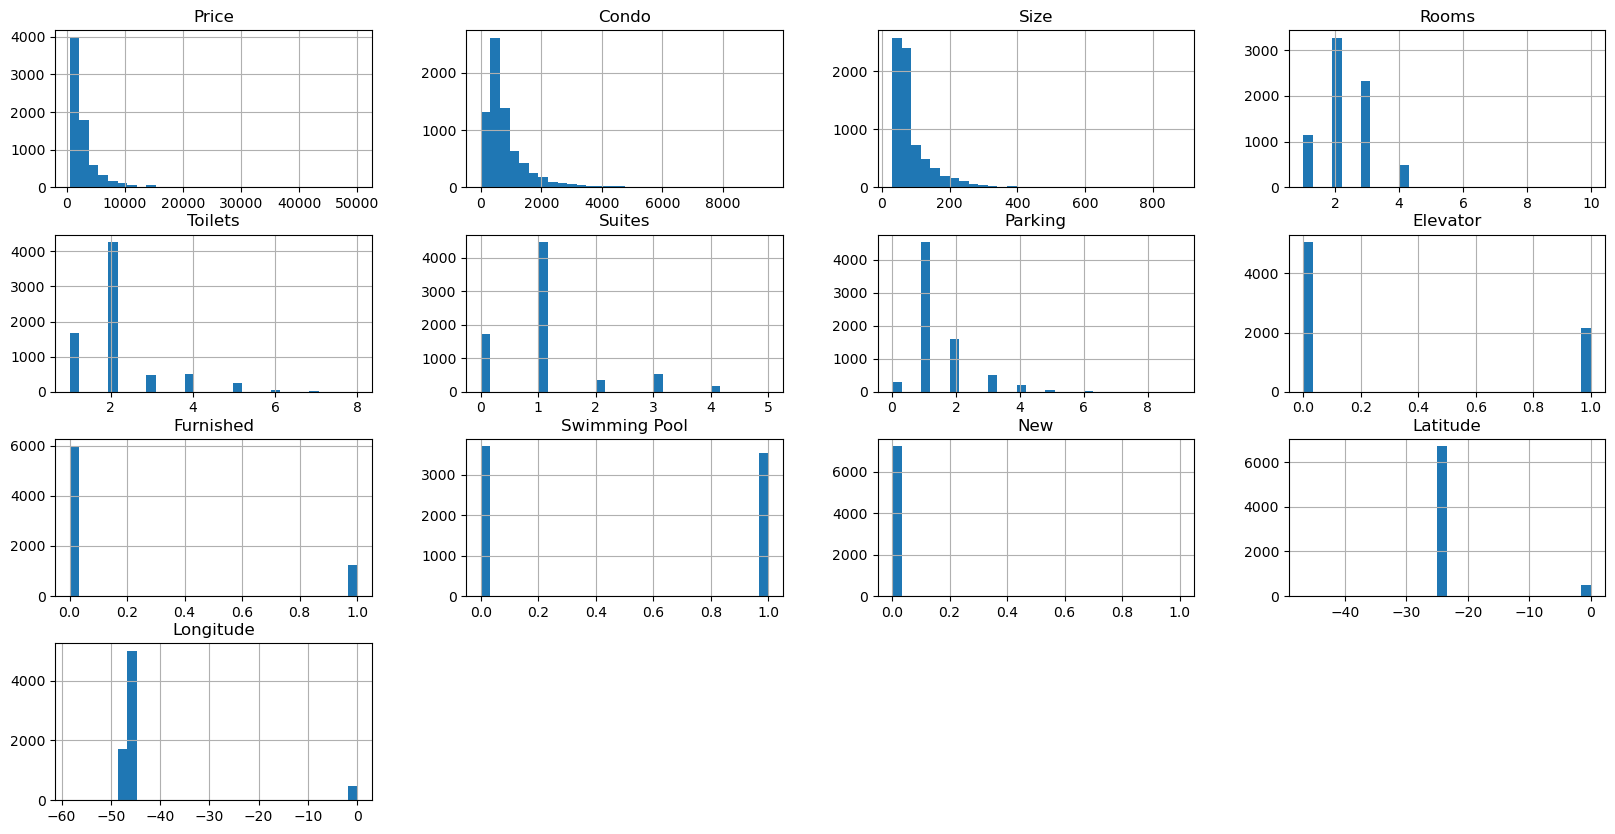

In [270]:
df_rent.hist(bins=30, figsize=(20,10))

In [271]:
df_rent["Property Type"].value_counts() #Todos sao apartamentos

Property Type
apartment    7228
Name: count, dtype: int64

In [272]:
df_rent['District'].value_counts()

District
Mooca/São Paulo              178
Moema/São Paulo              163
Vila Mariana/São Paulo       161
Morumbi/São Paulo            159
Pinheiros/São Paulo          153
                            ... 
Lajeado/São Paulo              8
Guaianazes/São Paulo           6
Parque do Carmo/São Paulo      6
Jardim São Luis/São Paulo      3
Grajaú/São Paulo               2
Name: count, Length: 94, dtype: int64

In [273]:
df_correlacao = df_rent.drop(columns=['District', 'Negotiation Type', 'Property Type'])
df_correlacao.corr()

Price     Condo      Size     Rooms   Toilets    Suites  \
Price          1.000000  0.700361  0.731795  0.390951  0.583488  0.588329   
Condo          0.700361  1.000000  0.812374  0.494153  0.596520  0.597069   
Size           0.731795  0.812374  1.000000  0.673232  0.694294  0.701954   
Rooms          0.390951  0.494153  0.673232  1.000000  0.557247  0.545859   
Toilets        0.583488  0.596520  0.694294  0.557247  1.000000  0.920932   
Suites         0.588329  0.597069  0.701954  0.545859  0.920932  1.000000   
Parking        0.640743  0.703888  0.752954  0.592387  0.703447  0.718788   
Elevator       0.031860  0.020271  0.006993  0.000993  0.143176  0.106189   
Furnished      0.171859  0.075928  0.005886 -0.104705  0.068190  0.068014   
Swimming Pool  0.206884  0.198613  0.148408  0.151225  0.262526  0.267219   
New           -0.008477 -0.011678 -0.017416 -0.022166 -0.007862 -0.006231   
Latitude      -0.036935 -0.045458 -0.043168 -0.050753 -0.128304 -0.130413   
Longitude     -0.038362 -0.048381 -0.046238 -0.052897 -0.129482 -0.131519   

                Parking  Elevator  Furnished  Swimming Pool       New  \
Price          0.640743  0.031860   0.171859       0.206884 -0.008477   
Condo          0.703888  0.020271   0.075928       0.198613 -0.011678   
Size           0.752954  0.006993   0.005886       0.148408 -0.017416   
Rooms          0.592387  0.000993  -0.104705       0.151225 -0.022166   
Toilets        0.703447  0.143176   0.068190       0.262526 -0.007862   
Suites         0.718788  0.106189   0.068014       0.267219 -0.006231   
Parking        1.000000  0.027476   0.066077       0.304904  0.001547   
Elevator       0.027476  1.000000   0.095207       0.150773  0.044049   
Furnished      0.066077  0.095207   1.000000       0.185192  0.012224   
Swimming Pool  0.304904  0.150773   0.185192       1.000000  0.019915   
New            0.001547  0.044049   0.012224       0.019915  1.000000   
Latitude      -0.054828 -0.117160  -0.022449      -0.025033  0.030711   
Longitude     -0.057929 -0.108175  -0.018386      -0.020293  0.030722   

               Latitude  Longitude  
Price         -0.036935  -0.038362  
Condo         -0.045458  -0.048381  
Size          -0.043168  -0.046238  
Rooms         -0.050753  -0.052897  
Toilets       -0.128304  -0.129482  
Suites        -0.130413  -0.131519  
Parking       -0.054828  -0.057929  
Elevator      -0.117160  -0.108175  
Furnished     -0.022449  -0.018386  
Swimming Pool -0.025033  -0.020293  
New            0.030711   0.030722  
Latitude       1.000000   0.976032  
Longitude      0.976032   1.000000

In [274]:
df_correlacao.corr()['Price'].sort_values(ascending=False)

Price            1.000000
Size             0.731795
Condo            0.700361
Parking          0.640743
Suites           0.588329
Toilets          0.583488
Rooms            0.390951
Swimming Pool    0.206884
Furnished        0.171859
Elevator         0.031860
New             -0.008477
Latitude        -0.036935
Longitude       -0.038362
Name: Price, dtype: float64

## 2. Preparação de dados para os modelos de ML

### Limpeza de dados desnecessários

In [277]:
df_cleaned = df_rent.drop(["New","Property Type","Negotiation Type"], axis=1)
df_cleaned

Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  \
0        930    220    47      2        2       1        1         0   
1       1000    148    45      2        2       1        1         0   
2       1000    100    48      2        2       1        1         0   
3       1000    200    48      2        2       1        1         0   
4       1300    410    55      2        2       1        1         1   
...      ...    ...   ...    ...      ...     ...      ...       ...   
11205   3700    595    73      1        2       1        1         0   
11206  21000   3000   208      4        4       3        3         1   
11207   3800    710    55      1        1       0        1         0   
11208   5000   2354   205      3        2       1        2         1   
11209  15600   2300   162      3        4       3        3         0   

       Furnished  Swimming Pool               District   Latitude  Longitude  
0              0              0  Artur Alvim/São Paulo -23.543138 -46.479486  
1              0              0  Artur Alvim/São Paulo -23.550239 -46.480718  
2              0              0  Artur Alvim/São Paulo -23.542818 -46.485665  
3              0              0  Artur Alvim/São Paulo -23.547171 -46.483014  
4              0              0  Artur Alvim/São Paulo -23.525025 -46.482436  
...          ...            ...                    ...        ...        ...  
11205          0              1     Brooklin/São Paulo -23.617682 -46.694963  
11206          1              1     Brooklin/São Paulo -23.606891 -46.695934  
11207          1              1     Brooklin/São Paulo   0.000000   0.000000  
11208          0              0     Brooklin/São Paulo -23.612287 -46.681482  
11209          0              1     Brooklin/São Paulo -23.615823 -46.685404  

[7228 rows x 13 columns]

### Tratamento de dados categóricos

In [279]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

district_encoded = ordinal_encoder.fit_transform(df_cleaned[['District']])

In [280]:
district_encoded

array([[3.],
       [3.],
       [3.],
       ...,
       [9.],
       [9.],
       [9.]])

In [281]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

housing_cat_1hot = cat_encoder.fit_transform(df_cleaned[["District"]])
housing_cat_1hot

<7228x94 sparse matrix of type '<class 'numpy.float64'>'
	with 7228 stored elements in Compressed Sparse Row format>

In [282]:
housing_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [283]:
one_hot = pd.get_dummies(df_cleaned['District'])
df = df_cleaned.drop('District', axis=1)
df = df.join(one_hot)
df

Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  \
0        930    220    47      2        2       1        1         0   
1       1000    148    45      2        2       1        1         0   
2       1000    100    48      2        2       1        1         0   
3       1000    200    48      2        2       1        1         0   
4       1300    410    55      2        2       1        1         1   
...      ...    ...   ...    ...      ...     ...      ...       ...   
11205   3700    595    73      1        2       1        1         0   
11206  21000   3000   208      4        4       3        3         1   
11207   3800    710    55      1        1       0        1         0   
11208   5000   2354   205      3        2       1        2         1   
11209  15600   2300   162      3        4       3        3         0   

       Furnished  Swimming Pool  ...  Vila Jacuí/São Paulo  \
0              0              0  ...                 False   
1              0              0  ...                 False   
2              0              0  ...                 False   
3              0              0  ...                 False   
4              0              0  ...                 False   
...          ...            ...  ...                   ...   
11205          0              1  ...                 False   
11206          1              1  ...                 False   
11207          1              1  ...                 False   
11208          0              0  ...                 False   
11209          0              1  ...                 False   

       Vila Leopoldina/São Paulo  Vila Madalena/São Paulo  \
0                          False                    False   
1                          False                    False   
2                          False                    False   
3                          False                    False   
4                          False                    False   
...                          ...                      ...   
11205                      False                    False   
11206                      False                    False   
11207                      False                    False   
11208                      False                    False   
11209                      False                    False   

       Vila Maria/São Paulo  Vila Mariana/São Paulo  Vila Matilde/São Paulo  \
0                     False                   False                   False   
1                     False                   False                   False   
2                     False                   False                   False   
3                     False                   False                   False   
4                     False                   False                   False   
...                     ...                     ...                     ...   
11205                 False                   False                   False   
11206                 False                   False                   False   
11207                 False                   False                   False   
11208                 False                   False                   False   
11209                 False                   False                   False   

       Vila Olimpia/São Paulo  Vila Prudente/São Paulo  Vila Sônia/São Paulo  \
0                       False                    False                 False   
1                       False                    False                 False   
2                       False                    False                 False   
3                       False                    False                 False   
4                       False                    False                 False   
...                       ...                      ...                   ...   
11205                   False                    False                 False   
11206                   False                    False                 Fals

## 3. Selecão e Treinamento de Múltiplos Modelos

In [285]:
df

Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  \
0        930    220    47      2        2       1        1         0   
1       1000    148    45      2        2       1        1         0   
2       1000    100    48      2        2       1        1         0   
3       1000    200    48      2        2       1        1         0   
4       1300    410    55      2        2       1        1         1   
...      ...    ...   ...    ...      ...     ...      ...       ...   
11205   3700    595    73      1        2       1        1         0   
11206  21000   3000   208      4        4       3        3         1   
11207   3800    710    55      1        1       0        1         0   
11208   5000   2354   205      3        2       1        2         1   
11209  15600   2300   162      3        4       3        3         0   

       Furnished  Swimming Pool  ...  Vila Jacuí/São Paulo  \
0              0              0  ...                 False   
1              0              0  ...                 False   
2              0              0  ...                 False   
3              0              0  ...                 False   
4              0              0  ...                 False   
...          ...            ...  ...                   ...   
11205          0              1  ...                 False   
11206          1              1  ...                 False   
11207          1              1  ...                 False   
11208          0              0  ...                 False   
11209          0              1  ...                 False   

       Vila Leopoldina/São Paulo  Vila Madalena/São Paulo  \
0                          False                    False   
1                          False                    False   
2                          False                    False   
3                          False                    False   
4                          False                    False   
...                          ...                      ...   
11205                      False                    False   
11206                      False                    False   
11207                      False                    False   
11208                      False                    False   
11209                      False                    False   

       Vila Maria/São Paulo  Vila Mariana/São Paulo  Vila Matilde/São Paulo  \
0                     False                   False                   False   
1                     False                   False                   False   
2                     False                   False                   False   
3                     False                   False                   False   
4                     False                   False                   False   
...                     ...                     ...                     ...   
11205                 False                   False                   False   
11206                 False                   False                   False   
11207                 False                   False                   False   
11208                 False                   False                   False   
11209                 False                   False                   False   

       Vila Olimpia/São Paulo  Vila Prudente/São Paulo  Vila Sônia/São Paulo  \
0                       False                    False                 False   
1                       False                    False                 False   
2                       False                    False                 False   
3                       False                    False                 False   
4                       False                    False                 False   
...                       ...                      ...                   ...   
11205                   False                    False                 False   
11206                   False                    False                 Fals

In [286]:
from sklearn.model_selection import train_test_split

In [287]:
Y = df['Price']
X = df.loc[:, df.columns != "Price"]

In [288]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

### Modelo de Regressão Linear

In [290]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train) #Fazer Otimizacao de custo para otimizar o Modelo

LinearRegression()

In [291]:
LinearRegression()

LinearRegression()

In [292]:
alguns_dados = x_train.iloc[:5]
algumas_labels = y_train.iloc[:5]

print("Predicoes: ", lin_reg.predict(alguns_dados))
print("Labels: ", algumas_labels.values)

Predicoes:  [1707.73791504 2483.69934082 1335.61804199 1038.52319336 3762.72558594]
Labels:  [1200 3000 1500 1100 4800]


In [293]:
from sklearn.metrics import mean_squared_error

preds = lin_reg.predict(x_train)
lin_mse = mean_squared_error(y_train,preds) #Linear Mean Square Error
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1953.6255195941415

### Decision Tree Regressor

In [295]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [296]:
preds = tree_reg.predict(x_train)
tree_mse = mean_squared_error(y_train, preds)

tree_rmse = np.sqrt(tree_mse)
tree_rmse

37.83253953461059

### Avaliação mais precisa usando Cross Validation

In [298]:
from sklearn.model_selection import cross_val_score 

scores = cross_val_score(tree_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores: ",scores)
    print("Mean: ", scores.mean())
    print("Standart deviation: ", scores.std())

display_scores(tree_rmse_scores)

Scores:  [2046.51374534 2287.11322416 2419.71141636 2827.9959454  2840.79172947
 3017.65901493 1864.24203151 3337.42373081 2337.86660869 2997.35961767]
Mean:  2597.6677064344217
Standart deviation:  450.8701292448792


In [299]:
scores = cross_val_score(lin_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)

Scores:  [1.66812725e+03 1.72896989e+03 1.86185418e+03 1.06962944e+10
 1.82717352e+03 2.82619899e+03 1.49088767e+03 2.51900487e+03
 1.89219213e+03 1.87549925e+03]
Mean:  1069631210.8710693
Standart deviation:  3208887735.9773145


### RandomForest Regressor

In [301]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)

RandomForestRegressor()

In [302]:
preds = rf_reg.predict(x_train)
rf_mse = mean_squared_error(y_train, preds)

rf_rmse = np.sqrt(tree_mse)
rf_rmse

37.83253953461059

In [303]:
scores = cross_val_score(rf_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-scores)
display_scores(rf_rmse_scores)

Scores:  [1770.45909686 1694.44996311 1411.22141661 1748.45865662 1508.32971008
 2474.2363149  1406.25629637 2482.78994539 1784.02592236 1817.7253677 ]
Mean:  1809.7952689999117
Standart deviation:  364.18828085524757


## 4. Avaliando e Otimizando o Modelo

### Otimizando o Modelo através do GridSearch

In [306]:
from sklearn.model_selection import GridSearchCV #Vai fazer uma pesquisa em Grid de todos os parametros que eu passaar pra ele e fazer um cross val

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features':[2, 4, 6, 8]},                  #Aqui iremos testar 12 Modelos Diferentes
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}   #Aqui iremos testar 6  Modelos Diferentes
    
] #Total de 18 modelos, fazendo um cross validation em cada um e ficando com o melhor

random_forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(random_forest_reg, param_grid, cv= 5, scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [307]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [308]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

## 5. Avaliação Final com Dados de Teste

In [310]:
final_model = grid_search.best_estimator_
final_model_predictions = final_model.predict(x_test)

final_mse = mean_squared_error(y_test, final_model_predictions)
print(np.sqrt(final_mse))

1751.9413370999239


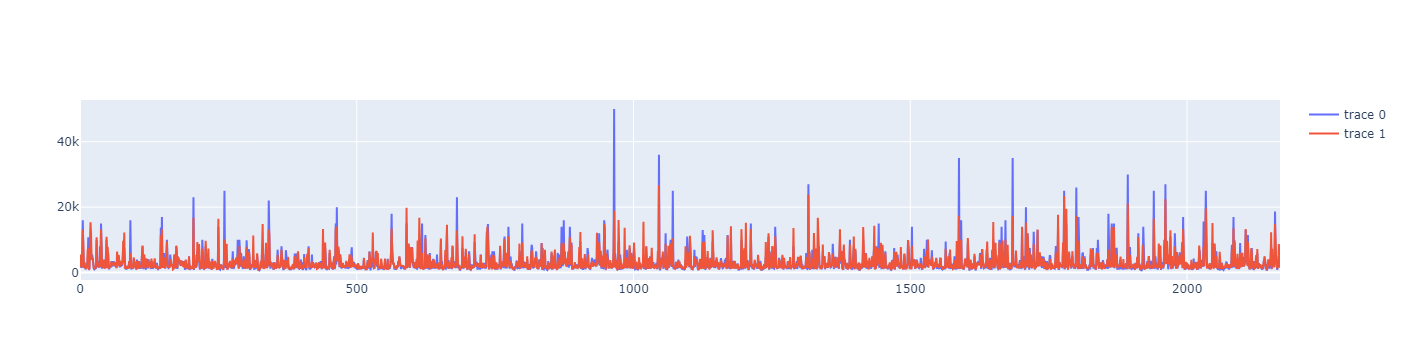

In [311]:
fig = go.Figure(data=[go.Scatter(y=y_test.values),
                     go.Scatter(y=final_model_predictions)])

fig.show()